#PROGRAMMING ASSIGNMENT 2 - TITANIC SURVIVAL PREDICTION










## **LOAD THE DATASET**

In [1]:
#load the full dataset
from google.colab import files
uploaded = files.upload()

Saving titanic3.xls to titanic3 (2).xls


In [2]:
#import librarys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import numpy
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
numpy.random.seed(10)
from sklearn.model_selection import train_test_split
import altair as alt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#define the dataframe
df = pd.read_excel('titanic3.xls')

# **ABOUT THE DATASET**






*   Survived: Survived (1) or died (0)
*   Pclass: Passenger’s class
*   Name: Passenger’s name
*   Sex: Passenger’s sex
*   Age: Passenger’s age
*   SibSp: Number of siblings/spouses aboard
*   Parch: Number of parents/children aboard
*   Ticket: Ticket number
*   Fare: Fare (in British Pound)
*   Cabin: Cabin
*   Embarked: Port of embarkation
*   Boat: Lifeboat (if survived)
*   Body: Body number (if did not survive and body was recovered)
*   Home.dest: Home/Destination


## **EXPLORATARY DATA ANALYSIS [EDA]**

Observation:


1.   There are 14 colums in the dataset and a total of 1309 entries with a lot of missing values in age, Cabin, boat, body and home.dest
2.  Name, sex, ticket, cabin, embarked and boat have dtype as object and might need to be changed while creating models.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
#inspect the first few and last few rows of the dataset
df.head(-5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0000,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN


In [7]:
#Inspect total rows and columns in the dataset
df.shape

(1309, 14)

In [8]:
# identify datatypes of the 14 columns and also name that columns as DataType
datadict = pd.DataFrame(df.dtypes)
datadict
datadict = datadict.rename(columns={0:'DataType'})
datadict

# identify missing values of the 14 columns
datadict['MissingVal'] = df.isnull().sum()
datadict

# Identify number of unique values
datadict['NUnique']=df.nunique()
datadict

# Identify the count for each variable, add the stats to datadict
datadict['Count']=df.count()
datadict


,DataType,MissingVal,NUnique,Count
pclass,int64,0,3,1309
survived,int64,0,2,1309
name,object,0,1307,1309
sex,object,0,2,1309
age,float64,263,98,1046
sibsp,int64,0,7,1309
parch,int64,0,8,1309
ticket,object,0,939,1309
fare,float64,1,281,1308
cabin,object,1014,186,295


**GRAPHICAL EXPLORATARY DATA ANALYSIS**

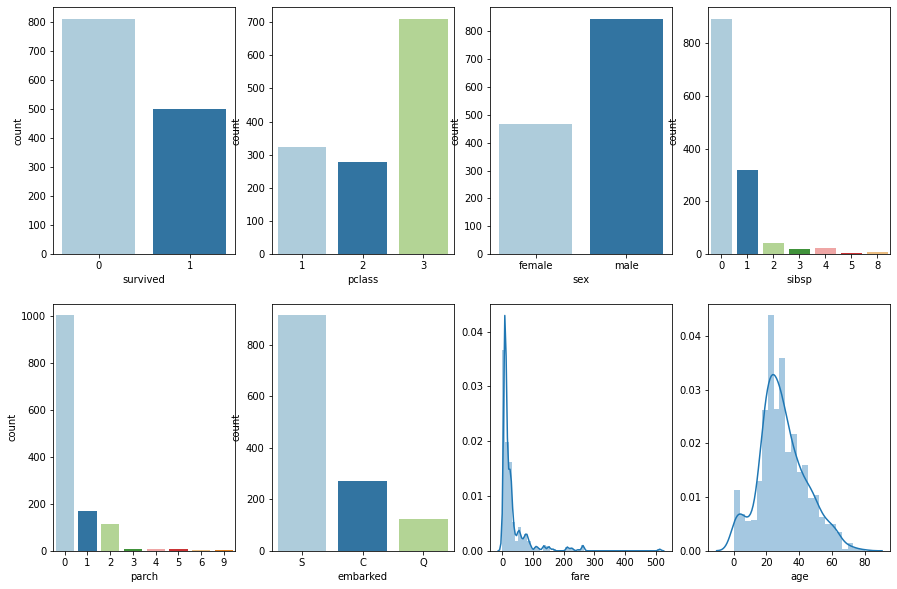

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
sns.countplot('survived',data=df,ax=axes[0,0],palette=sns.color_palette("Paired"))
sns.countplot('pclass',data=df,ax=axes[0,1],palette=sns.color_palette("Paired"))
sns.countplot('sex',data=df,ax=axes[0,2],palette=sns.color_palette("Paired"))
sns.countplot('sibsp',data=df,ax=axes[0,3],palette=sns.color_palette("Paired"))
sns.countplot('parch',data=df,ax=axes[1,0],palette=sns.color_palette("Paired"))
sns.countplot('embarked',data=df,ax=axes[1,1],palette=sns.color_palette("Paired"))
sns.distplot(df['fare'], kde=True,ax=axes[1,2])
sns.distplot(df['age'].dropna(),kde=True,ax=axes[1,3])



In [10]:
alt.Chart(df).mark_area(
    opacity=0.5, interpolate='step').encode(alt.X('age:Q',bin=alt.Bin(maxbins=20)),
                                            alt.Y('count()'),alt.Color('survived:N'))


alt.Chart(...)

In [11]:
alt.Chart(df).mark_area(
    opacity=0.5, interpolate='step').encode(alt.X('fare:Q',bin=alt.Bin(maxbins=20)),
                                            alt.Y('count()'),alt.Color('survived:N'))

alt.Chart(...)

Text(0.5, 0.98, 'Scatterplot of passengers in relation to Fare and Age for the 3 ports')

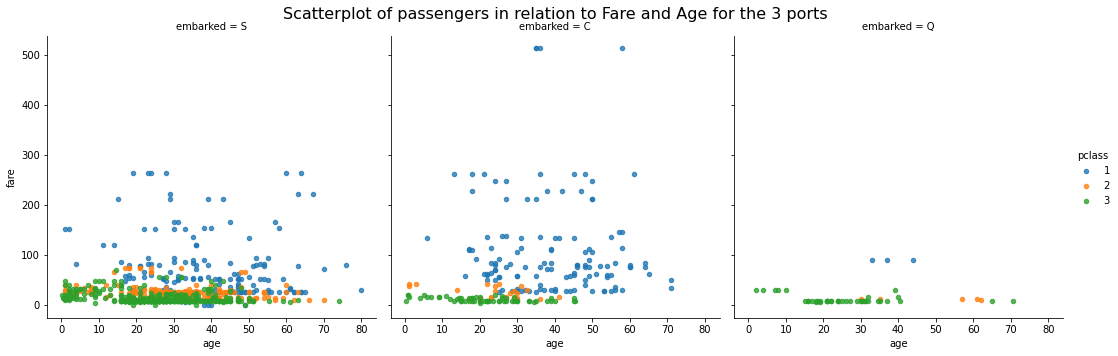

In [12]:
sns.lmplot('age', 'fare', data=df, fit_reg=False, hue="pclass", col="embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers in relation to Fare and Age for the 3 ports', fontsize=16)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Embarkation and gender wise segregation of passengers')

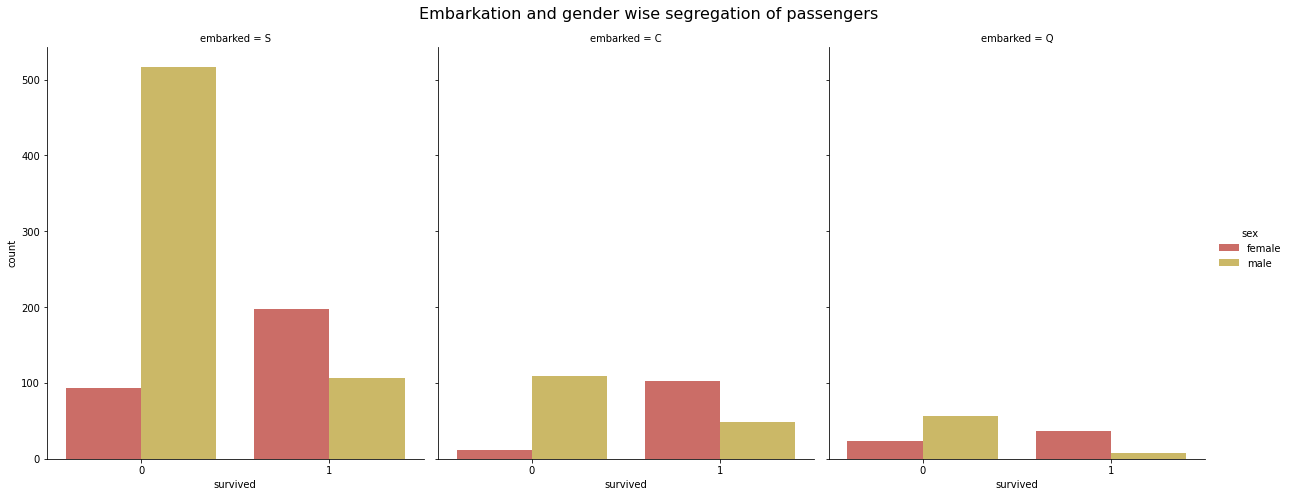

In [13]:
sns.factorplot('survived', col='embarked', hue='sex', data=df, kind='count', size=7, aspect=.8, palette=sns.color_palette("hls", 8))
plt.subplots_adjust(top=0.9)
plt.suptitle('Embarkation and gender wise segregation of passengers', fontsize=16)


## **DATA PREPROCESSING**

In [14]:
datadict['MissingVal'] = df.isnull().sum()
datadict

,DataType,MissingVal,NUnique,Count
pclass,int64,0,3,1309
survived,int64,0,2,1309
name,object,0,1307,1309
sex,object,0,2,1309
age,float64,263,98,1046
sibsp,int64,0,7,1309
parch,int64,0,8,1309
ticket,object,0,939,1309
fare,float64,1,281,1308
cabin,object,1014,186,295


In [0]:
df= df.drop(columns=['name','embarked','ticket','fare','home.dest','cabin','boat','body'])

In [0]:
df = df.fillna(value=0.0)

In [0]:
df= df[df['age']!=0]

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

df.iloc[:,2]=labelencoder.fit_transform(df.iloc[:,2].values)

In [19]:
print(df['sex'].unique())

[0 1]


In [20]:
#new df after dropping all the unwanted rows and columns and 
#after converting sex column into '0' and '1'.
df

,pclass,survived,sex,age,sibsp,parch
0,1,1,0,29.0000,0,0
1,1,1,1,0.9167,1,2
2,1,0,0,2.0000,1,2
3,1,0,1,30.0000,1,2
4,1,0,0,25.0000,1,2
...,...,...,...,...,...,...
1301,3,0,1,45.5000,0,0
1304,3,0,0,14.5000,1,0
1306,3,0,1,26.5000,0,0
1307,3,0,1,27.0000,0,0


In [0]:
df=df.reset_index(drop=True)

### VISUALIZATION AFTER CLEANING THE DATA

In [22]:
alt.Chart(df).mark_bar().encode(alt.Y('survived:N',title=None),
                                alt.X('count()'),alt.Color('survived:N'), row='sex')

alt.Chart(...)

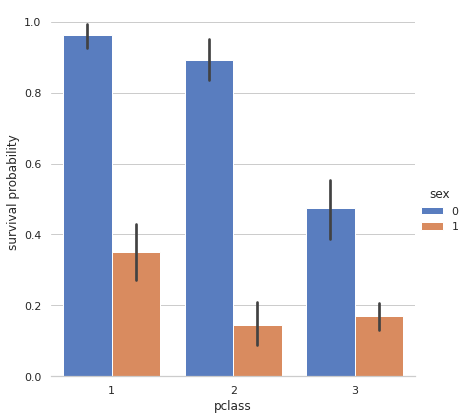

In [23]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.catplot(x="pclass", y="survived", hue="sex", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

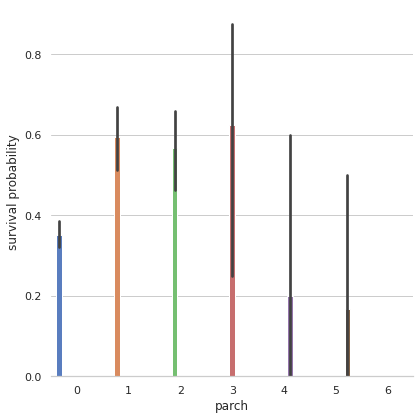

In [24]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.catplot(x="parch", y="survived", hue="parch", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

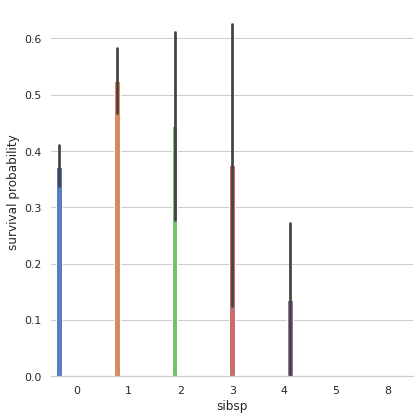

In [25]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.catplot(x="sibsp", y="survived", hue="sibsp", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

SPLIT THE DATASET

In [0]:
split=train_test_split(df,test_size=0.2)

In [27]:
split

[      pclass  survived  sex      age  sibsp  parch
 228        1         1    0  40.0000      0      0
 700        3         1    0   0.1667      1      2
 491        2         0    1  36.0000      0      0
 600        3         0    1  32.0000      1      0
 598        3         1    0  13.0000      0      0
 ...      ...       ...  ...      ...    ...    ...
 490        2         1    0  33.0000      0      2
 256        1         1    0  39.0000      1      1
 1032       3         0    1  18.0000      1      0
 733        3         0    0   9.0000      2      2
 527        2         0    1  23.0000      1      0
 
 [836 rows x 6 columns],      pclass  survived  sex    age  sibsp  parch
 770       3         0    1  11.00      0      0
 489       2         1    0   8.00      1      1
 664       3         1    0  22.00      0      0
 791       3         0    1  17.00      1      0
 863       3         0    1  24.00      1      0
 ..      ...       ...  ...    ...    ...    ...
 374   

In [0]:
(traindf, testdf) = split

## **DATA MODELING**

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation,Dropout,Input,Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [0]:
trainy= traindf['survived'].reset_index(drop=True)

trainx= traindf.drop(columns=['survived']).reset_index(drop=True)

In [0]:
testy= testdf['survived'].reset_index(drop=True)

testx= testdf.drop(columns=['survived']).reset_index(drop=True)


In [0]:
def create_model( regress=True, output=1):
  x=Input(shape=(5,))
  i= x
  x= Flatten()(x)
  x= Activation("relu")(x)
  x= Dense(5)(x)
  x= Activation("relu")(x)
  x= Dropout(0.1)(x)
  x= Dense(2)(x)
  x= Activation("relu")(x)
  x= Dropout(0.1)(x)
  #x= Dense(3)(x)
  #x= Activation("relu")(x)
  #x= Dropout(0.1)(x)
  x= Dense(1,activation='sigmoid')(x)
  model=Model(i,x)
  return model

In [33]:
model = create_model()
#opt = Adam(learning_rate=0.001, epsilon = 1e-7)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=trainx, 
          y=trainy, 
          epochs=500,
          validation_data=(testx, testy), verbose=1,batch_size=20
          
          )

Epoch 1/500
42/42 [==============================] - 0s 6ms/step - loss: 0.8055 - accuracy: 0.5849 - val_loss: 0.6944 - val_accuracy: 0.6190
Epoch 2/500
42/42 [==============================] - 0s 2ms/step - loss: 0.8101 - accuracy: 0.5730 - val_loss: 0.6882 - val_accuracy: 0.6238
Epoch 3/500
42/42 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.5622 - val_loss: 0.6846 - val_accuracy: 0.6238
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.5742 - val_loss: 0.6821 - val_accuracy: 0.6286
Epoch 5/500
42/42 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.5718 - val_loss: 0.6798 - val_accuracy: 0.6190
Epoch 6/500
42/42 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.5658 - val_loss: 0.6780 - val_accuracy: 0.6095
Epoch 7/500
42/42 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.5849 - val_loss: 0.6767 - val_accuracy: 0.6095
Epoch 8/500
4

In [0]:
valx=trainx[0:0]

In [35]:
valx

,pclass,sex,age,sibsp,parch


In [0]:
jack = pd.Series( [ 3, 1, 23, 0, 0] )
rose = pd.Series( [1, 0, 20, 1, 1] )
priya = pd.Series( [2, 0, 29, 1,0 ] )

In [0]:
jack_rose_priya_df = pd.DataFrame( [list(jack), list(rose), list(priya)], columns=['pclass', 'sex', 'age', 'sibsp', 'parch'] )

### PREDICTION OF MY SURVIVAL AFTER TRAINING THE MODEL

In [131]:
survive=model.predict(jack_rose_priya_df)
sdf = jack_rose_priya_df
sdf['survived']=survive
sdf['Name']=['Jack','Rose','Priya']
print(sdf)

   pclass  sex  age  sibsp  parch  survived   Name
0       3    1   23      0      0  0.172574   Jack
1       1    0   20      1      1  0.979631   Rose
2       2    0   29      1      0  0.869891  Priya


In [0]:
# list all data in history
#train_history.history

### MODEL VISULAIZATION

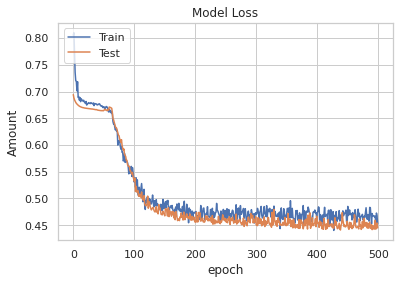

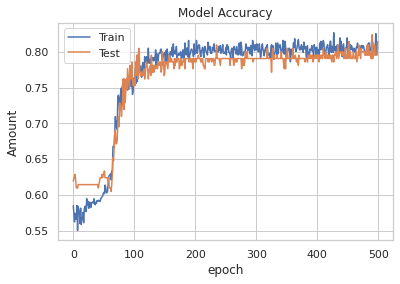

In [45]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Amount')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Amount')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()






